In [1]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
import re

In [2]:
request=requests.get("http://books.toscrape.com/")

In [3]:
soup=BeautifulSoup(request.text,'html.parser')

## Title of Website

In [4]:

title=re.sub('[\n|-]','',soup.title.text).lstrip()
title

'All products  Books to Scrape  Sandbox'

In [5]:
## Creating f(x) which convert str rating to the integer
def rating_str_to_num_conversion(rating_txt):
    rating_list=list()
    for r in rating_txt:
        if r=='One':
            rating_list.append(1)
        elif r=='Two':
            rating_list.append(2)
        elif r=='Three':
            rating_list.append(3)
        elif r=='Four':
            rating_list.append(4)
        elif r=='Five':
            rating_list.append(5)
            
    return rating_list

In [6]:
## geting all rating of the one page
def get_rating_list(soup,rating_arr):
    a=soup.find_all('p',class_='star-rating')
    rating_txt=re.findall('Three|One|Four|Two|Five',str(a))
    rating_list=rating_str_to_num_conversion(rating_txt)
    for i in rating_list:
        rating_arr.append(i)
    return rating_arr

In [7]:
## geting all book names of the one page
def get_books_name(soup,book_name_arr):
    a=soup.find_all('h3')
    books_titles=[i.text for i in a]
    for i in books_titles:
        book_name_arr.append(i)
    return book_name_arr

In [8]:
## geting all book prices of the one page
def get_book_prices(soup,book_arr):
    l=soup.find_all('p',attrs={'class':'price_color'})
    books_prices=[i.text for i in l]
    for i in books_prices:
        book_arr.append(i)
    return book_arr

In [9]:
## geting all whether book is available or not of the one page
def check_book_availability(soup,books_arr):
    z=soup.find_all('p',class_='instock availability')
    books_data=[re.sub('[\n]','',i.text.strip()) for i in z]
    for i in books_data:
        books_arr.append(i)
    return books_arr

In [10]:
url='http://books.toscrape.com/catalogue'
rating_list=list()
book_list=list()
book_prices_list=list()
book_availability_list=list()
for page in range(1,50):
    
    request=requests.get(url+'/page-'+str(page)+'.html')
    soup=BeautifulSoup(request.text,'html.parser')
    rating_list=get_rating_list(soup,rating_list)
    book_list=get_books_name(soup,book_list)
    book_prices_list=get_book_prices(soup,book_prices_list)
    book_availability_list=check_book_availability(soup,book_availability_list)

## Creating the DataFrame

In [11]:
df=pd.DataFrame({
    'Books_Name':book_list,
    'Books_Price':book_prices_list,
    'Rating':rating_list,
    'Availability_Stock':book_availability_list
})
df.head()

,Books_Name,Books_Price,Rating,Availability_Stock
0,A Light in the ...,Â£51.77,3,In stock
1,Tipping the Velvet,Â£53.74,1,In stock
2,Soumission,Â£50.10,1,In stock
3,Sharp Objects,Â£47.82,4,In stock
4,Sapiens: A Brief History ...,Â£54.23,5,In stock


In [12]:
df.to_csv(title+'.csv',index=False)

In [40]:
df=pd.read_csv("All products  Books to Scrape  Sandbox.csv")

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Books_Name          980 non-null    object
 1   Books_Price         980 non-null    object
 2   Rating              980 non-null    int64 
 3   Availability_Stock  980 non-null    object
dtypes: int64(1), object(3)
memory usage: 30.8+ KB


In [14]:
df.head()['Books_Name']

0              A Light in the ...
1              Tipping the Velvet
2                      Soumission
3                   Sharp Objects
4    Sapiens: A Brief History ...
Name: Books_Name, dtype: object

## Visualizing the data

### Matplotlib Visualization

In [15]:
import matplotlib.pyplot as plt

In [43]:
# converting book_price column into the float
str_book_price=df['Books_Price'].str.replace('Â£','')
df['Books_Price']=str_book_price.astype(float)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Books_Name          980 non-null    object 
 1   Books_Price         980 non-null    float64
 2   Rating              980 non-null    int64  
 3   Availability_Stock  980 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 30.8+ KB


In [48]:
df

,Books_Name,Books_Price,Rating,Availability_Stock
0,A Light in the ...,51.77,3,In stock
1,Tipping the Velvet,53.74,1,In stock
2,Soumission,50.10,1,In stock
3,Sharp Objects,47.82,4,In stock
4,Sapiens: A Brief History ...,54.23,5,In stock
...,...,...,...,...
975,Icing (Aces Hockey #2),40.44,4,In stock
976,"Hawkeye, Vol. 1: My ...",45.24,3,In stock
977,Having the Barbarian's Baby ...,34.96,4,In stock
978,"Giant Days, Vol. 1 ...",56.76,4,In stock


In [46]:
# top 10 largest rating

top_10=df.nlargest(n=10,columns=['Rating'])
top_10

,Books_Name,Books_Price,Rating,Availability_Stock
4,Sapiens: A Brief History ...,54.23,5,In stock
12,Set Me Free,17.46,5,In stock
13,Scott Pilgrim's Precious Little ...,52.29,5,In stock
14,Rip it Up and ...,35.02,5,In stock
23,Chase Me (Paris Nights ...,25.27,5,In stock
24,Black Dust,34.53,5,In stock
28,Worlds Elsewhere: Journeys Around ...,40.30,5,In stock
30,The Four Agreements: A ...,17.66,5,In stock
32,The Elephant Tree,23.82,5,In stock
34,Sophie's World,15.94,5,In stock


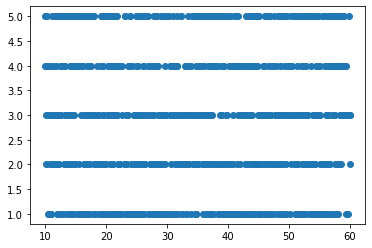

In [59]:
plt.scatter(df['Books_Price'],df['Rating'])

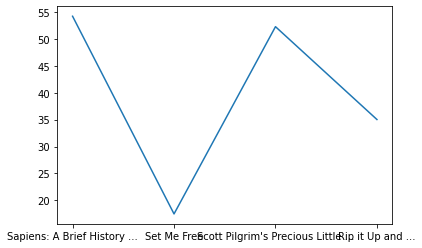

In [58]:
plt.plot(top_10['Books_Name'].head(4),top_10['Books_Price'].head(4))

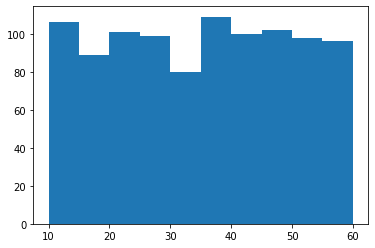

In [62]:
plt.hist(df['Books_Price']);

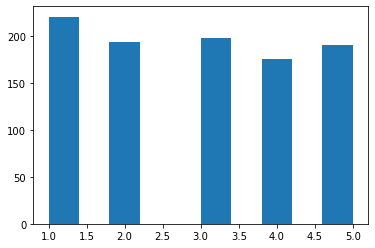

In [64]:
plt.hist(df['Rating']);

In [81]:
(df['Rating'].value_counts()/980)*100

1    22.551020
3    20.204082
2    19.795918
5    19.489796
4    17.959184
Name: Rating, dtype: float64

In [88]:
rating_vals=df['Rating'].value_counts()
rating_vals.sort_index(inplace=True)
rating_vals

1    221
2    194
3    198
4    176
5    191
Name: Rating, dtype: int64

In [96]:
rating_vals=(rating_vals/980)*100
rating_vals

1    22.551020
2    19.795918
3    20.204082
4    17.959184
5    19.489796
Name: Rating, dtype: float64

In [94]:
distinct_rating_label=df['Rating'].unique()
distinct_rating_label.sort()
distinct_rating_label

array([1, 2, 3, 4, 5], dtype=int64)

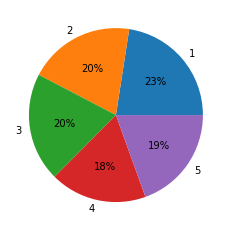

In [98]:
plt.pie(rating_vals,labels=distinct_rating_label,autopct='%.0f%%');

### Seaborn Visualization

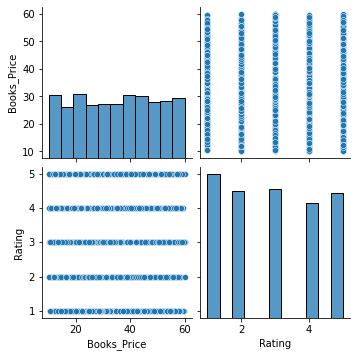

In [60]:
import seaborn as sns
sns.pairplot(df)

<AxesSubplot:xlabel='Rating', ylabel='Count'>

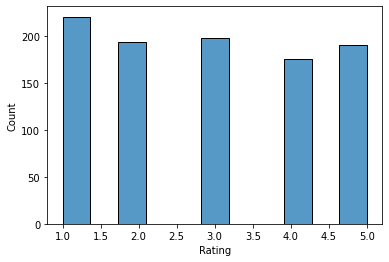

In [71]:
sns.histplot(df['Rating'])